In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv("train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Basic questions
1. Who were the passenger on the Titanic
        Mean age = 30
        Mostly male
2. What deck were the passengers on and how does that relate to their class?
        Unanswered question.
        Decks B and C were most popular
3. Where did the passangers come from?
        Mostly from Southampton
4. Who was alone and who was with family?
        Most people travelled alone
### Real question
<br>
5. What factors helped someone survive the accident?
        Being a woman helps.
        If you are a man, it is better to be young than old
        If you are a woman, it is better to be old than young
        For women deck did not seem to have significant impact on survivability
        For men deck D and E were rather favorable for survivability
        Being alone seems to have negative effect on surviving
        Being alone was especially bad for in A and E classes due to increased portion of males

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

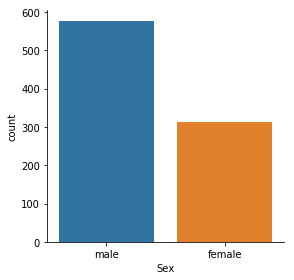

In [6]:
sns.factorplot(data=titanic_df, 
               x="Sex",
               kind="count")

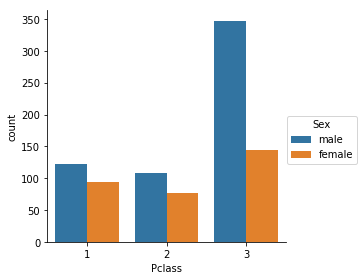

In [7]:
sns.factorplot(data=titanic_df,
               x="Pclass",
               hue="Sex",
               kind="count")

In [8]:
def male_female_child(passanger):
    age,sex = passanger
    if age < 16:
        return "child"
    else:
        return sex

In [9]:
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)

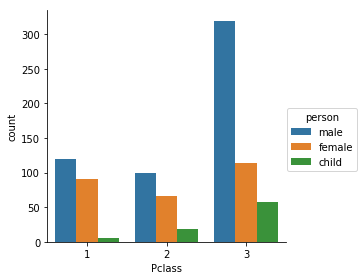

In [10]:
sns.factorplot(data=titanic_df,
               x="Pclass",
               hue="person",
               kind="count")

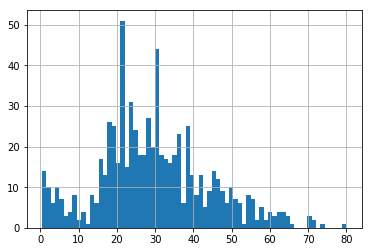

In [11]:
titanic_df["Age"].hist(bins=70)

In [12]:
titanic_df["Age"].mean()

29.69911764705882

In [13]:
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

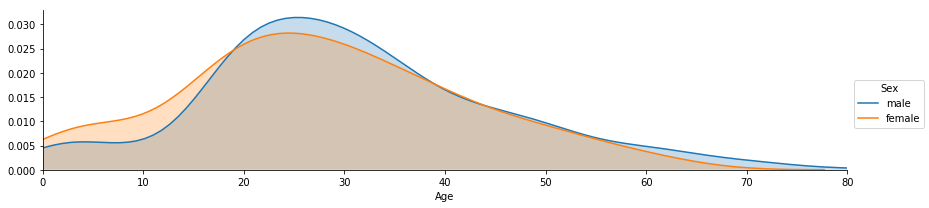

In [14]:
fig = sns.FacetGrid(titanic_df,
                    hue="Sex",
                    aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

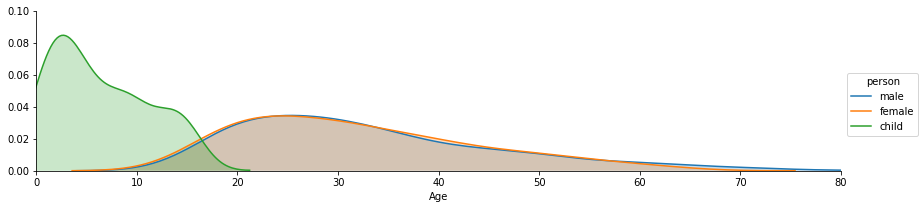

In [15]:
fig = sns.FacetGrid(titanic_df,
                    hue="person",
                    aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.1))
fig.add_legend()

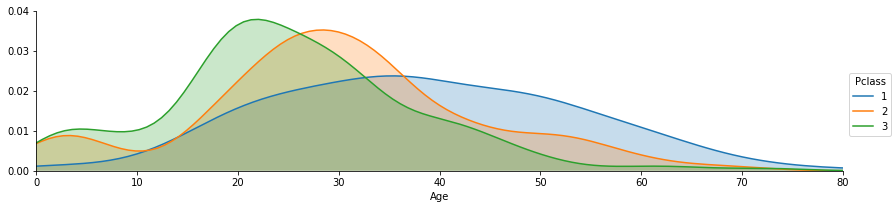

In [16]:
fig = sns.FacetGrid(titanic_df,
                    hue="Pclass",
                    aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.set(ylim=(0,0.04))
fig.add_legend()

In [17]:
deck = titanic_df["Cabin"].dropna()

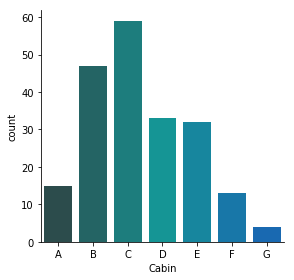

In [18]:
levels = []
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]
cabin_df = cabin_df[cabin_df.Cabin != "T"]

sns.factorplot(data=cabin_df, 
               x="Cabin",
               kind="count",
               palette="winter_d",
               order=list("ABCDEFG"))

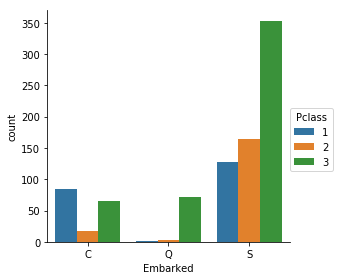

In [19]:
sns.factorplot(data=titanic_df, 
               x="Embarked",
               hue="Pclass",
               kind="count",
               order=["C","Q","S"])

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch
titanic_df["Alone"]

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [22]:
titanic_df["Alone"].loc[titanic_df["Alone"] > 0] = "With Family"
titanic_df["Alone"].loc[titanic_df["Alone"] == 0] = "Alone"

/Users/viliheikkila/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


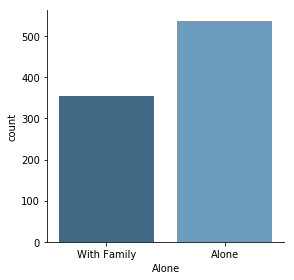

In [24]:
sns.factorplot(data=titanic_df,
               x="Alone",
               kind="count",
               palette = "Blues_d")

In [25]:
titanic_df["Survivor"] = titanic_df.Survived.map({0:"no",1:"yes"})

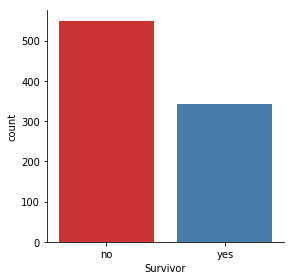

In [26]:
sns.factorplot(data=titanic_df,
               x="Survivor",
               kind="count",
               palette="Set1")

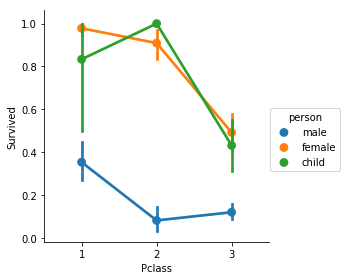

In [27]:
sns.factorplot(data=titanic_df,
               x="Pclass",
               y="Survived",
               hue="person")

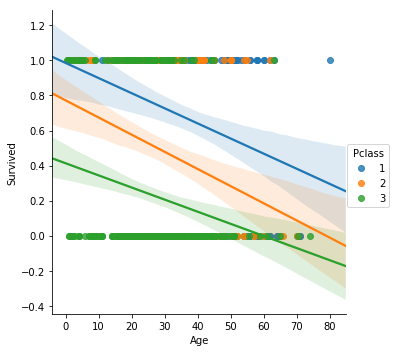

In [28]:
sns.lmplot(data=titanic_df,
           x="Age",
           y="Survived",
           hue="Pclass")

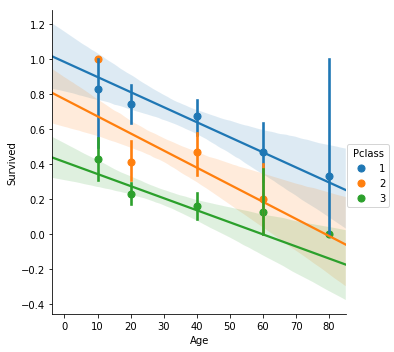

In [29]:
generations = [10,20,40,60,80]
sns.lmplot(data=titanic_df,
           x="Age",
           y="Survived",
           hue="Pclass",
           x_bins=generations)

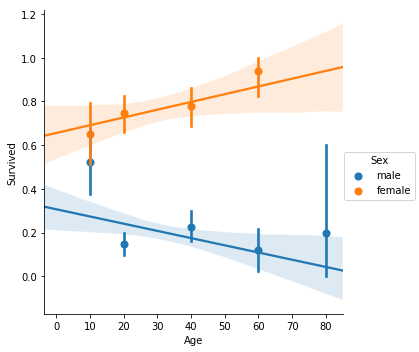

In [30]:
sns.lmplot(data=titanic_df,
           x="Age",
           y="Survived",
           hue="Sex",
           x_bins=[10,20,40,60,80])

In [31]:
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)

In [32]:
def get_deck(row):
    if pd.isnull(row["Cabin"]):
        return "Unknown"
    else:
        return row["Cabin"][0]
    

In [33]:
titanic_df["Deck"] = titanic_df.apply(get_deck, axis=1)

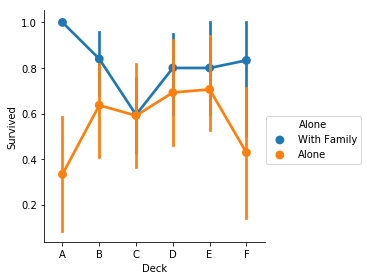

In [34]:
sns.factorplot(data=titanic_df,
               x="Deck",
               y="Survived",
               hue="Alone",
               order=list("ABCDEF"))

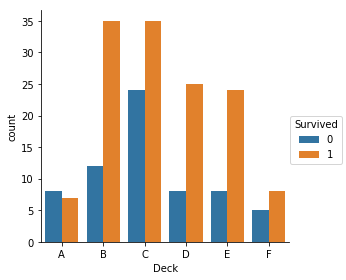

In [35]:
sns.factorplot(data=titanic_df,
               x="Deck",
               hue="Survived",
               kind="count",
               order=list("ABCDEF"))

In [39]:
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Unknown
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no,Unknown
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes,Unknown
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes,Unknown


In [37]:
women_df = titanic_df[titanic_df["Sex"]=="female"]

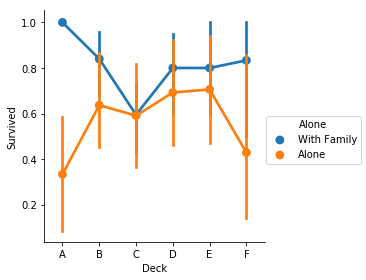

In [44]:
sns.factorplot(data=titanic_df,
               x="Deck",
               y="Survived",
               hue="Alone",
               order=list("ABCDEF"))